# Graduate Admissions - Classification

1.Serial No.

2.GRE [Graduate Record Examinations] Scores ( out of 340 ).

3.TOEFL [Test of English as a Foreign Language] Scores ( out of 120 ).

4.University Rating ( out of 5 ).

5.SOP [Statement of Purpose].

6.LOR [Letter of Recommendation Strength] ( out of 5 ).

7.CGPA [Cumulative Grade Points Average] ( out of 10 ).

8.Research ( either 0 or 1 ).

9.Chance of Admit ( ranging from 0 to 1 ).

**Using classification technique for prediction of Graduate Admissions from an Indian perspective**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

load the dataset

In [3]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict.csv")

In [4]:
df.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [5]:
df.shape

(400, 9)

# Data Preprocessing

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Renaming columns.
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:

# Drop 'Serial No.'
df = df.drop('Serial_No.',axis=1)

In [10]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance_of_Admit       60
dtype: int64

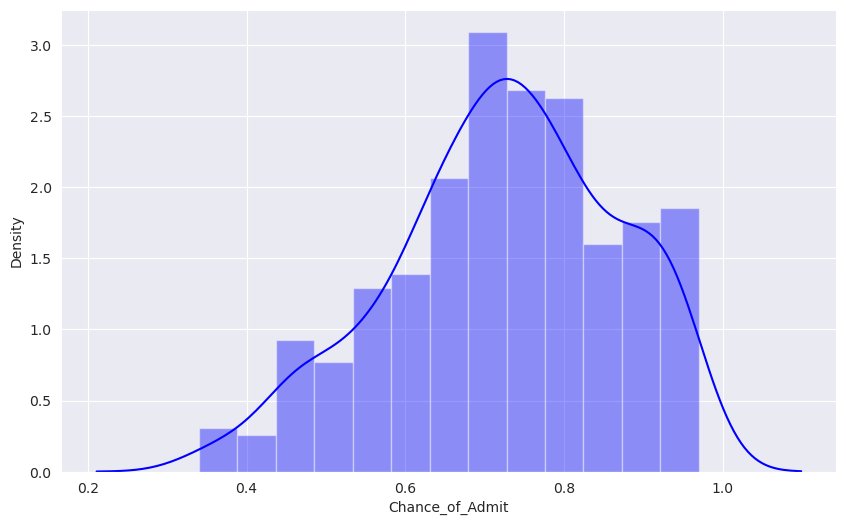

In [12]:
# Plot 'Chance_of_Admit'

plt.figure(figsize=(10, 6))
sns.distplot(df['Chance_of_Admit'], kde = True, color = "b")
plt.show()

Now lets set some cut-off scores and try to analyse scores above the cut-off

In [13]:
co_gre=df[df["GRE_Score"]>=300]
co_toefel=df[df["TOEFL_Score"]>=100]

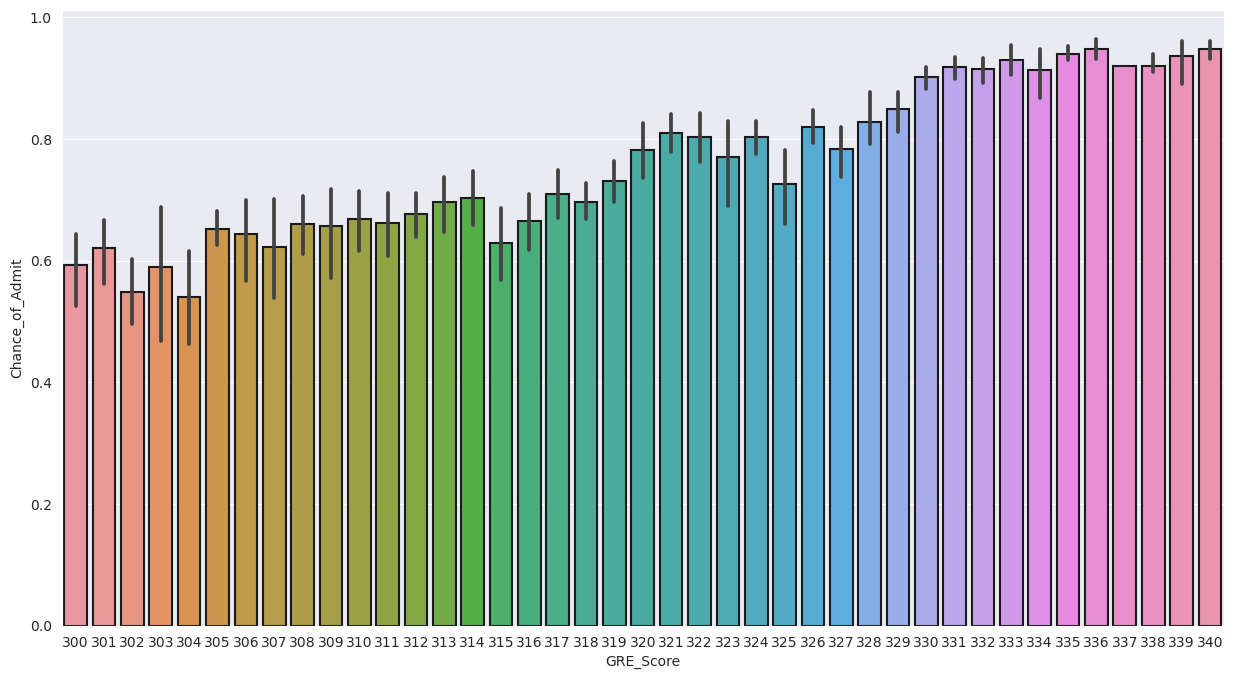

In [14]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='GRE_Score',y='Chance_of_Admit',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

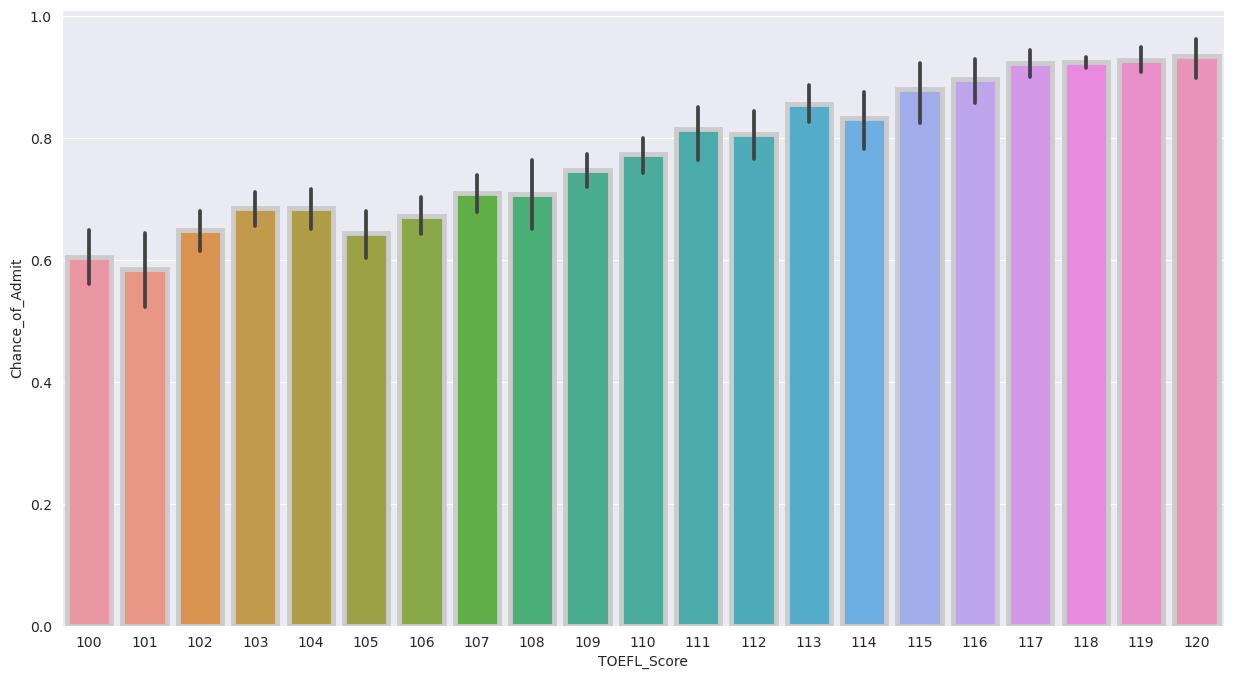

In [15]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='TOEFL_Score',y='Chance_of_Admit',data=co_toefel, linewidth=3.5,edgecolor="0.8")
plt.show()

The above two graphs make it clear that higher the Scores better the chance of admit

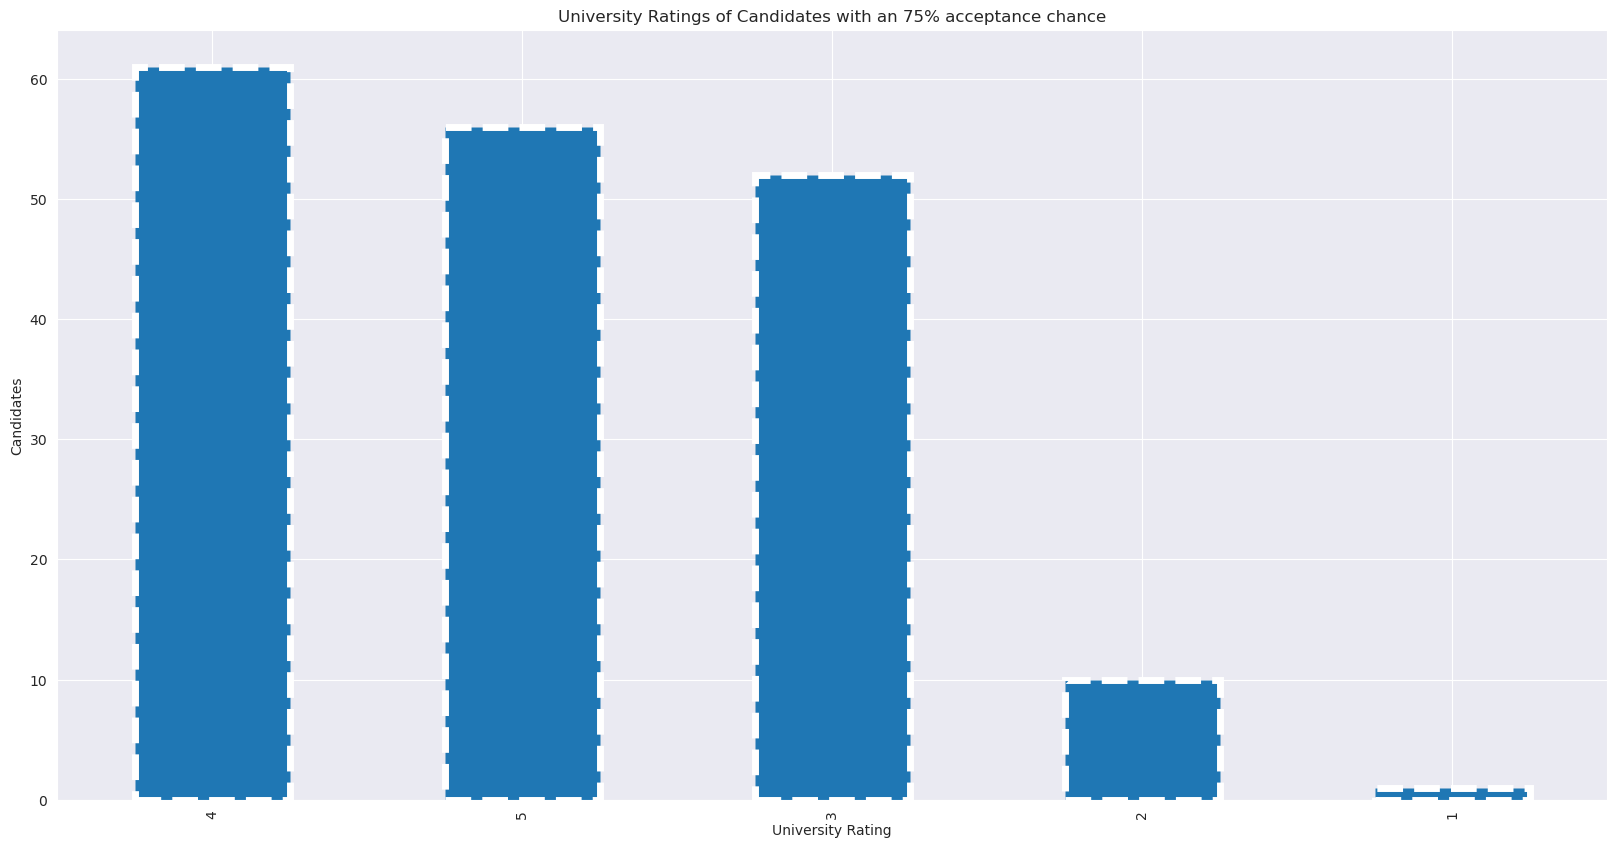

In [16]:
s_top = df[df["Chance_of_Admit"] >= 0.75]["University_Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s_top.plot(kind='bar',figsize=(20, 10),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [17]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE_Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL_Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance_of_Admit'].mean()*100))

Average GRE Score :316.81 out of 340
Average TOEFL Score:107.41 out of 120
Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.44%


Top 20 candidates who who got chanve_of_admit

In [18]:
toppers=df[(df['GRE_Score']>=330) & (df['TOEFL_Score']>=115) & (df['CGPA']>=9.5)].sort_values(by=['Chance_of_Admit'],ascending=False)
toppers

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
203,334,120,5,4.0,5.0,9.87,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
213,333,119,5,5.0,4.5,9.78,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96
399,333,117,4,5.0,4.0,9.66,1,0.95
372,336,119,4,4.5,4.0,9.62,1,0.95


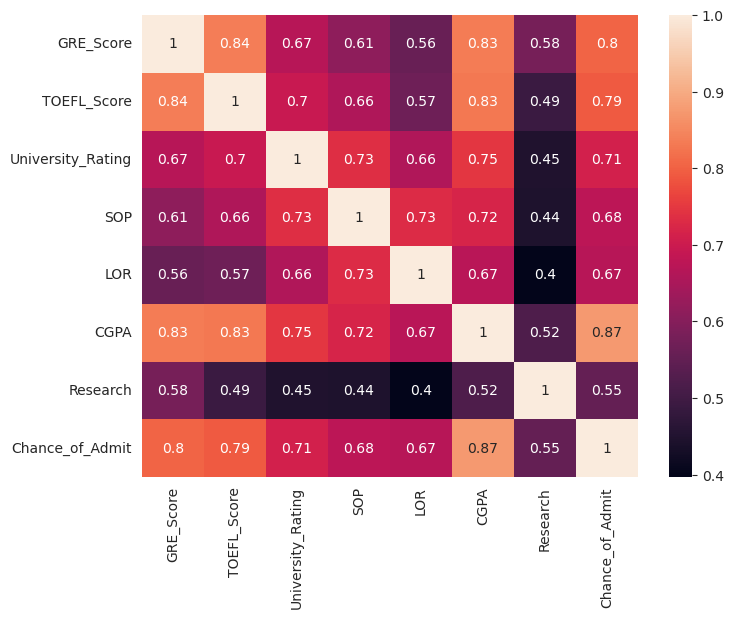

In [19]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

Create a binary class
we will create a binary class (1=admission likely , 0=admission unlikely) from the chance of admit – greater than 70% we will consider as likely. The remaining data columns will be used as predictors.

In [20]:
#data = df[['GRE_Score','TOEFL_Score','CGPA','LOR','Chance_of_Admit']]
df.loc[df['Chance_of_Admit']>=0.70,'Chance_of_Admit'] = 1
df.loc[df['Chance_of_Admit']<0.70,'Chance_of_Admit'] = 0
df['Chance_of_Admit'] = df['Chance_of_Admit'].astype('int')

In [21]:
df.head(4)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1


In [22]:
df["Chance_of_Admit"].value_counts()

1    247
0    153
Name: Chance_of_Admit, dtype: int64

In [23]:
# Dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "y":
X = df.drop(["Chance_of_Admit"], axis = 1)
y = df["Chance_of_Admit"]

sptling the data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)#split the data

In [25]:
#checking the shape of train and test
print(X_train.shape, X_test.shape)

(320, 7) (80, 7)


In [26]:
df.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit        int64
dtype: object

change the Research & University_Rating datatypes to category

In [27]:
X_train['Research'] = X_train['Research'].astype('category')
X_test['Research'] = X_test['Research'].astype('category')
X_train['University_Rating'] = X_train['University_Rating'].astype('category')
X_test['University_Rating'] = X_test['University_Rating'].astype('category')

In [28]:
num_col=X_train.select_dtypes(['float64','int64']).columns
num_col

Index(['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [29]:
cat_columns=X_train.select_dtypes(['category']).columns
cat_columns

Index(['University_Rating', 'Research'], dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder #scalling and encoding

In [31]:
#standardscaler for numerical columns
scaler = StandardScaler()                                                                                                                                                                                                                                                                                                                    
scaler.fit(X_train[num_col])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_col]), columns=num_col)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_col]), columns=num_col)

one hot encoding for categorical variable 

In [32]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [33]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [34]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [35]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [36]:
#checking the shape of train and test:
print(X_train.shape, X_test.shape)

(320, 10) (80, 10)


In [37]:
# Checking the top 5 records in y_train:
y_train.head(3)

178    1
252    1
6      1
Name: Chance_of_Admit, dtype: int64

In [38]:
import sklearn.metrics as metrics

In [39]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = metrics.accuracy_score(train_actual,train_predicted)
    train_recall   = metrics.recall_score(train_actual,train_predicted,average="weighted")
    train_precision= metrics.precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = metrics.f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = metrics.accuracy_score(test_actual,test_predicted)
    test_recall   = metrics.recall_score(test_actual,test_predicted,average="weighted")
    test_precision= metrics.precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = metrics.f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [41]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

 # Model building

**LogisticRegression**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logistic_model = LogisticRegression(solver='liblinear',random_state=120)

In [44]:
Model=logistic_model.fit(X_train,y_train)

In [45]:
y_train_Pred_log = logistic_model.predict(X_train)
y_test_Pred_log = logistic_model.predict(X_test)

In [46]:
y_pred = logistic_model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[23  8]
 [ 3 46]]


In [48]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[23  8]
 [ 3 46]]

True Positives(TP) =  23

True Negatives(TN) =  46

False Positives(FP) =  8

False Negatives(FN) =  3


In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8403554970375248

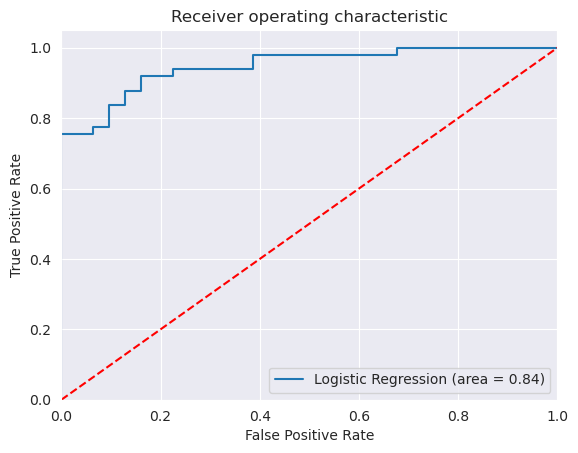

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
classifcation_report_train_test(y_train, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.7923    0.8443    0.8175       122
           1     0.9000    0.8636    0.8814       198

    accuracy                         0.8562       320
   macro avg     0.8462    0.8539    0.8495       320
weighted avg     0.8589    0.8562    0.8570       320


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8846    0.7419    0.8070        31
           1     0.8519    0.9388    0.8932        49

    accuracy                         0.8625        80
   macro avg     0.8682    0.8404    0.8501        80
weighted avg     0.8645    0.8625    0.8598        80



In [52]:
scores=get_metrics(y_train,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.85625,0.85625,0.858942,0.85705,0.8625,0.8625,0.864548,0.859807


**DecisionTreeClassifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)

In [54]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [55]:
dt.feature_importances_

array([0.18004881, 0.06588375, 0.08131208, 0.08487243, 0.52766394,
       0.02537042, 0.        , 0.        , 0.        , 0.03484858])

In [56]:
feature_scores = pd.Series(dt.feature_importances_,
                           index=X_train.columns).sort_values(ascending=False)

feature_scores 

CGPA                   0.527664
GRE_Score              0.180049
LOR                    0.084872
SOP                    0.081312
TOEFL_Score            0.065884
Research_1             0.034849
University_Rating_2    0.025370
University_Rating_3    0.000000
University_Rating_4    0.000000
University_Rating_5    0.000000
dtype: float64

In [57]:
feature_scores = pd.DataFrame({'Feature_names':X_train.columns,'Importances':dt.feature_importances_})
feature_scores

,Feature_names,Importances
0,GRE_Score,0.180049
1,TOEFL_Score,0.065884
2,SOP,0.081312
3,LOR,0.084872
4,CGPA,0.527664
5,University_Rating_2,0.025370
6,University_Rating_3,0.000000
7,University_Rating_4,0.000000
8,University_Rating_5,0.000000
9,Research_1,0.034849


In [58]:
y_train_predt = dt.predict(X_train)
y_test_predt = dt.predict(X_test)

In [59]:
classifcation_report_train_test(y_train, y_train_predt, y_test, y_test_predt)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    0.9754    0.9876       122
           1     0.9851    1.0000    0.9925       198

    accuracy                         0.9906       320
   macro avg     0.9925    0.9877    0.9900       320
weighted avg     0.9908    0.9906    0.9906       320


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.7407    0.6452    0.6897        31
           1     0.7925    0.8571    0.8235        49

    accuracy                         0.7750        80
   macro avg     0.7666    0.7512    0.7566        80
weighted avg     0.7724    0.7750    0.7717        80



In [60]:
dts=accuracy_score(y_test,y_test_predt)
dts

0.775

In [61]:
scores=get_metrics(y_train,y_train_predt,y_test,y_test_predt,"DecisionTree_model",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.856250,0.856250,0.858942,0.857050,0.8625,0.8625,0.864548,0.859807
1,DecisionTree_model,0.990625,0.990625,0.990765,0.990602,0.7750,0.7750,0.772414,0.771653


**Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [63]:
y_train_predrf = classifier.predict(X_train)
y_test_predrf = classifier.predict(X_test)

In [64]:
classifcation_report_train_test(y_train, y_train_predrf, y_test, y_test_predrf)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9914    0.9426    0.9664       122
           1     0.9657    0.9949    0.9801       198

    accuracy                         0.9750       320
   macro avg     0.9785    0.9688    0.9732       320
weighted avg     0.9755    0.9750    0.9749       320


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.7143    0.4839    0.5769        31
           1     0.7288    0.8776    0.7963        49

    accuracy                         0.7250        80
   macro avg     0.7215    0.6807    0.6866        80
weighted avg     0.7232    0.7250    0.7113        80



In [65]:
scores=get_metrics(y_train,y_train_predrf,y_test,y_test_predrf,"RandomForestClassifier",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.856250,0.856250,0.858942,0.857050,0.8625,0.8625,0.864548,0.859807
1,DecisionTree_model,0.990625,0.990625,0.990765,0.990602,0.7750,0.7750,0.772414,0.771653
2,RandomForestClassifier,0.975000,0.975000,0.975482,0.974871,0.7250,0.7250,0.723184,0.711289


In [66]:
rf=accuracy_score(y_test,y_test_predrf)
rf

0.725

**SVM classifier**

In [67]:
from sklearn import svm
from sklearn.datasets import make_classification

In [68]:
model = svm.SVC(kernel = 'linear', random_state = 0, )

In [69]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [70]:
y=model.predict(X_test)
y2=model.predict(X_train)

In [71]:
classifcation_report_train_test(y_train, y2, y_test, y)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8160    0.8361    0.8259       122
           1     0.8974    0.8838    0.8906       198

    accuracy                         0.8656       320
   macro avg     0.8567    0.8600    0.8582       320
weighted avg     0.8664    0.8656    0.8659       320


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8519    0.7419    0.7931        31
           1     0.8491    0.9184    0.8824        49

    accuracy                         0.8500        80
   macro avg     0.8505    0.8302    0.8377        80
weighted avg     0.8501    0.8500    0.8478        80



In [72]:
scores=get_metrics(y_train,y2,y_test,y,"SVM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.856250,0.856250,0.858942,0.857050,0.8625,0.8625,0.864548,0.859807
1,DecisionTree_model,0.990625,0.990625,0.990765,0.990602,0.7750,0.7750,0.772414,0.771653
2,RandomForestClassifier,0.975000,0.975000,0.975482,0.974871,0.7250,0.7250,0.723184,0.711289
3,SVM,0.865625,0.865625,0.866388,0.865928,0.8500,0.8500,0.850140,0.847769


# **test data**

In [73]:
final_pred = model.predict(X_test)

In [74]:
final_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [75]:
final_pred=pd.DataFrame(final_pred)

In [76]:
final_pred.head(5)

,0
0,1
1,1
2,1
3,1
4,0
